<a href="https://colab.research.google.com/github/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/blob/2ndbranch/Predict_Regression_Sprint_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing 

# Data Preprocessing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [0]:
train= pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Train.csv')
riders=pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Riders.csv')
test= pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/Test.csv')
sample_submission= pd.read_csv('https://raw.githubusercontent.com/thembeks/Regression-Sendy-Logistics-Challenge-Team-14/Predict/SampleSubmission.csv')

In [6]:
sample_submission.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [7]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [8]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [9]:
train.head().transpose()

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


# Data Summary and EDA

In [10]:
train.shape

(21201, 29)

In [11]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


**Observations**

*   For the distance the median or value at 50th percentile is higher than the mean. There is also a large difference between the max value and that of the 75th percentile, these 2 points could be an indication of a presence of outliers in the dataset.
*   The precipitation in millimeters column has missing values accounting for about 97% of the data, the mean and median of the column are more or less the same, therefore the missing values can be imputed with either. Imputation with either the mean or median value could affect the distribution of the data.



In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [15]:
train['Order No'].nunique()

21201


*   Unique number identifying the order
*   Not Important
*   Unique Order No for each entry







In [18]:
train['User Id'].value_counts()

User_Id_393     645
User_Id_2330    322
User_Id_3647    312
User_Id_1500    301
User_Id_635     290
               ... 
User_Id_3253      1
User_Id_100       1
User_Id_2202      1
User_Id_2018      1
User_Id_1864      1
Name: User Id, Length: 3186, dtype: int64

In [20]:
train['User Id'].describe()

count           21201
unique           3186
top       User_Id_393
freq              645
Name: User Id, dtype: object


*  Unique number identifying the customer on a platform
*  Important
*  More Orders for some Users
*  Create a new feature, classify most orders





In [22]:
train['Vehicle Type'].value_counts()

Bike    21201
Name: Vehicle Type, dtype: int64


*   For this competition limited to bikes, however in practice Sendy service extends to trucks and vans
*   Not Important
*   One type, drop column






In [23]:
train['Platform Type'].value_counts()

3    18054
1     2147
2      980
4       20
Name: Platform Type, dtype: int64


*   Platform used to place the order, there are 4 types
*   Important 
*   Create a new feature Platform Usage, most used platform and least used






In [25]:
train['Personal or Business'].value_counts()

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64


*   2 types of customers
*   Encode



In [0]:
cat_cols=['Platform Type','Personal or Business', 'Placement - Day of Month','Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month']
num_cols=['Distance (KM)','Temperature', 'Precipitation in millimeters']
#time_ser_cols=['Placement - Day of Month','Placement - Weekday (Mo = 1)','Placement - Time','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Confirmation - Time','Arrival at Pickup - Day of Month','Pickup - Time']

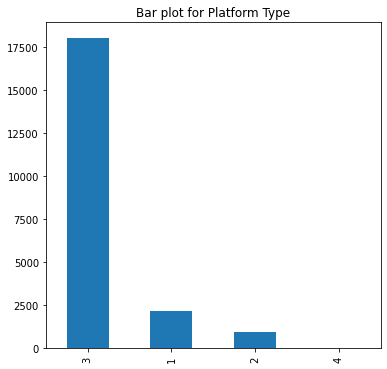

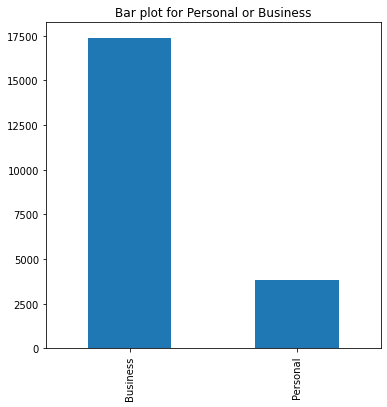

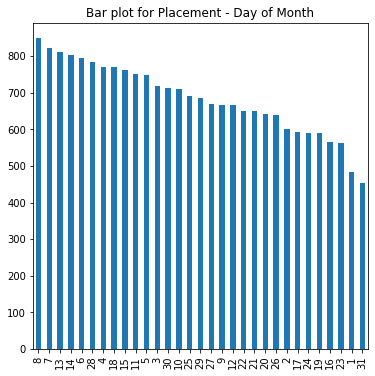

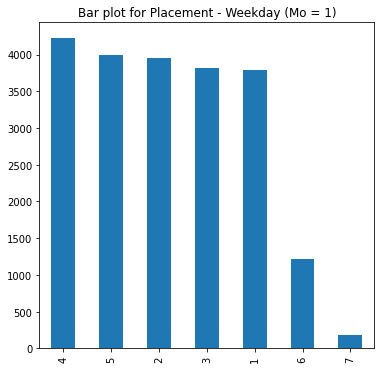

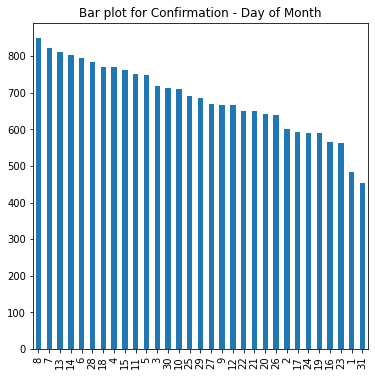

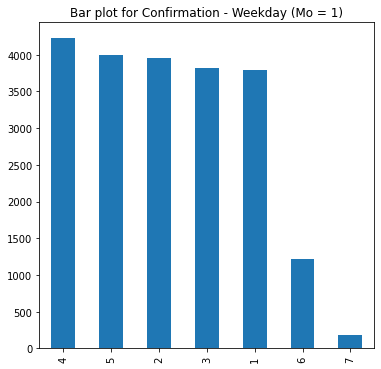

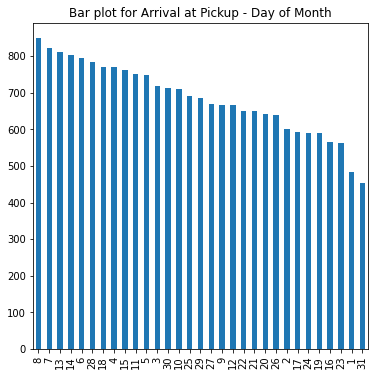

In [30]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = train[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)
    plt.show()

**Observations**

*   Platform type 3 is the most used plaform type
*   Most customer types are business
*   Most orders are placed, confirmed and arrive within the first 2 weeks of the month.








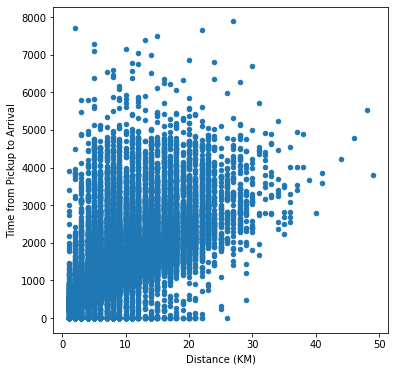

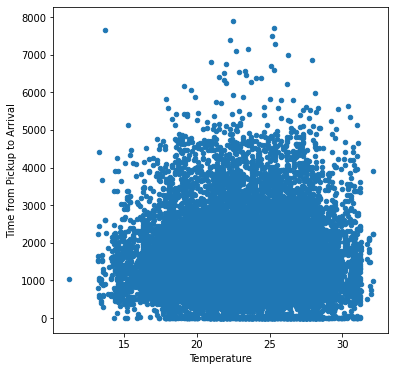

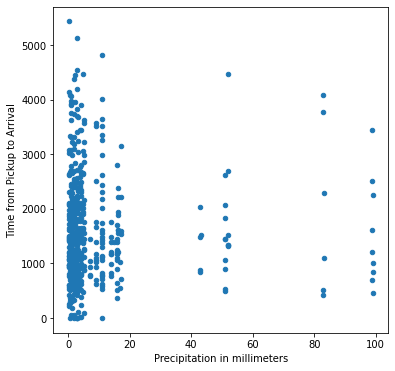

In [34]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    train.plot.scatter(x = col, y = 'Time from Pickup to Arrival', ax = ax)
    plt.show()

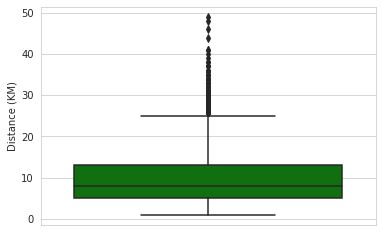

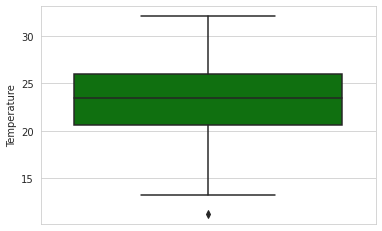

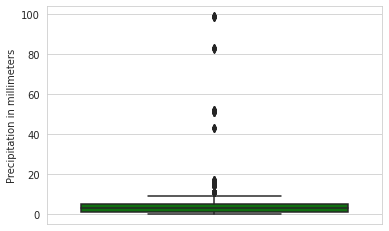

In [35]:
for col in num_cols:
    sns.set_style('whitegrid')
    sns.boxplot(train[col],color='green',orient='v')
    plt.show()

**Observations**

*   Distance has quite a number of outlier values, these may have an effect on the model since distance has shown to have the highest correlation with the dependent variable. The precipitation column also has outlier values, however, the distibution of the data is highly affected by the number of missing values.
*   Precipitation is clustered around certain points, we could create a new feature column to capture the clusters






**Missing Values and Columns**

In [36]:
for col in train:
    if col not in test:
        print(col)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [0]:
df_train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [39]:
train_missing=train.isnull().sum() * 100 / len(train)
train_missing=train_missing.drop(train_missing[train_missing==0].index).sort_values(ascending=False)
train_missing_data=pd.DataFrame({'Missing Percentage':train_missing})
train_missing_data

,Missing Percentage
Precipitation in millimeters,97.396349
Temperature,20.593368


In [40]:
test_missing=test.isnull().sum() * 100 / len(test)
test_missing=test_missing.drop(test_missing[test_missing==0].index).sort_values(ascending=False)
test_missing_data=pd.DataFrame({'Missing Percentage':test_missing})
test_missing_data

,Missing Percentage
Precipitation in millimeters,97.184493
Temperature,20.331070




*   97% of the data from the precipitation column is missing 
*   columns: Arrival at Destination - Day of Month, Arrival at Destination - Weekday (Mo = 1), Arrival at Destination - Time, Time from Pickup to Arrival are missing on the test dataframe. 
*   We can impute the missing values and drop the missing columns







# Correlation



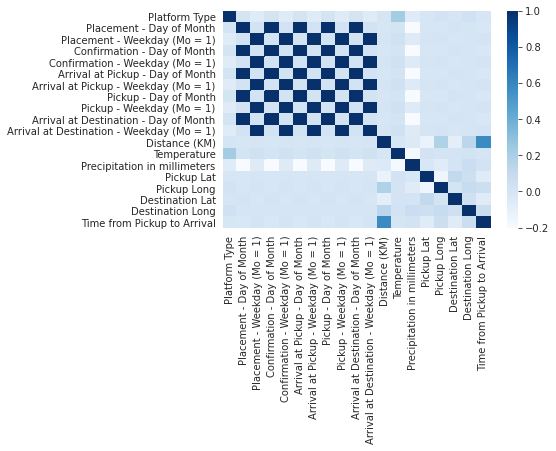

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(train.corr(),cmap='Blues',annot=False) 

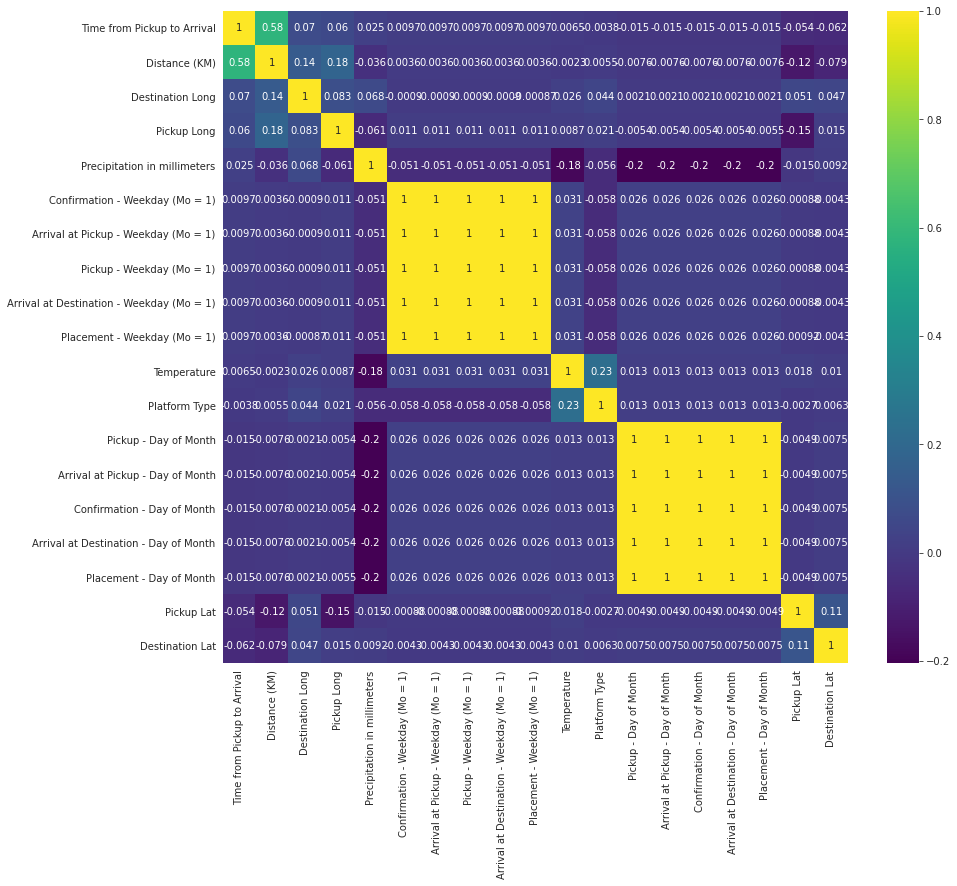

In [43]:
k = 19 #number of variables for heatmap
cols = train.corr().nlargest(k, 'Time from Pickup to Arrival')['Time from Pickup to Arrival'].index
cm = train[cols].corr()
plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [45]:
train.corr()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.225060,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.013097,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.031064,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.031074,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.013099,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701


**Observations**

*   The dependent variable is the most correlated with distance.
*   The columns for placement,confirmation,arrival at pickup (day of the month and weekday) are most correlated with each other. This attribute could pose a problem with multicollinearity when training the model.
*  Intuitively we expect to see high correlation between distance and the latitude and longitude columns, however, the correlation is not high. We may have to introduce normalization or standardization to the dataset, and we may have to select variables on the bases of minimal collinearity.






# Data Preprocessing

**Drop Columns**

In [87]:

copy=train.copy()
copy.drop(['Vehicle Type','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Arrival at Destination - Time', 'Order No'], axis=1, inplace=True)
copy.head()

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [97]:
copy[['a','b', 'UserId No']] = copy["User Id"].str.split("_", expand = True)
copy[['c','d','RiderId No']] = copy["Rider Id"].str.split("_",  expand = True)

copy.drop(["User Id",'Rider Id', 'a', 'b','c','d'], axis=1, inplace = True)
copy.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Placement - Time_Hour,Placement - Time_Minute,Placement - Time_Seconds,Confirmation - Time_Hour,Confirmation - Time_Minute,Confirmation - Time_Seconds,Arrival at Pickup - Time_Hour,Arrival at Pickup - Time_Minute,Arrival at Pickup - Time_Seconds,Pickup - Time_Hour,Pickup - Time_Minute,Pickup - Time_Seconds,Time from Pickup to Arrival,UserId No,RiderId No
0,3,1,9,5,9,5,9,5,9,5,4,20.400000,7.905797,-1.317755,36.830370,-1.300406,36.829741,9,35,46,9,40,10,10,4,47,10,27,30,745,633,432
1,3,0,12,5,12,5,12,5,12,5,16,26.400000,7.905797,-1.351453,36.899315,-1.295004,36.814358,11,16,16,11,23,21,11,40,22,11,44,9,1993,2285,856
2,3,1,30,2,30,2,30,2,30,2,3,23.258889,7.905797,-1.308284,36.843419,-1.300921,36.828195,12,39,25,12,42,44,12,49,34,12,53,3,455,265,155
3,3,1,15,5,15,5,15,5,15,5,9,19.200000,7.905797,-1.281301,36.832396,-1.257147,36.795063,9,25,34,9,26,5,9,37,56,9,43,6,1341,1402,855
4,1,0,13,1,13,1,13,1,13,1,9,15.400000,7.905797,-1.266597,36.792118,-1.295041,36.809817,9,55,18,9,56,18,10,3,53,10,5,23,1214,1737,770


In [0]:
copy.rename(columns={'UserId No':'User Id'}, inplace=True)
copy.rename(columns={'RiderId No':'Rider Id'}, inplace=True)

**Convert time Columns**

In [88]:
def time_converter(copy):
    for x in copy.columns:
        if x.endswith("Time"):
            copy[x] = pd.to_datetime(copy[x], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
    return copy

copy = time_converter(copy)
copy[['Placement - Time', 'Confirmation - Time' , 'Arrival at Pickup - Time', 'Pickup - Time']][3:6]

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time
3,09:25:34,09:26:05,09:37:56,09:43:06
4,09:55:18,09:56:18,10:03:53,10:05:23
5,15:07:35,15:08:57,15:21:36,15:30:30


In [0]:
copy['Placement - Time_Hour'] = pd.to_datetime(copy['Placement - Time']).dt.hour
copy['Placement - Time_Minute'] = pd.to_datetime(copy['Placement - Time']).dt.minute
copy['Placement - Time_Seconds'] = pd.to_datetime(copy['Placement - Time']).dt.second

copy['Confirmation - Time_Hour'] = pd.to_datetime(copy['Confirmation - Time']).dt.hour
copy['Confirmation - Time_Minute'] = pd.to_datetime(copy['Confirmation - Time']).dt.minute
copy['Confirmation - Time_Seconds'] = pd.to_datetime(copy['Confirmation - Time']).dt.second

copy['Arrival at Pickup - Time_Hour'] = pd.to_datetime(copy['Arrival at Pickup - Time']).dt.hour
copy['Arrival at Pickup - Time_Minute'] = pd.to_datetime(copy['Arrival at Pickup - Time']).dt.minute
copy['Arrival at Pickup - Time_Seconds'] = pd.to_datetime(copy['Arrival at Pickup - Time']).dt.second

copy['Pickup - Time_Hour'] = pd.to_datetime(copy['Pickup - Time']).dt.hour
copy['Pickup - Time_Minute'] = pd.to_datetime(copy['Pickup - Time']).dt.minute
copy['Pickup - Time_Seconds'] = pd.to_datetime(copy['Pickup - Time']).dt.second

In [0]:
copy.drop(['Pickup - Time','Arrival at Pickup - Time','Confirmation - Time','Placement - Time'], axis=1, inplace=True)


In [0]:
cols = list(copy.columns.values)
cols.pop(cols.index('Time from Pickup to Arrival')) 

copy = copy[cols+['Time from Pickup to Arrival']]

**Encoding Personal or Business Column**

In [92]:
copy['Personal or Business'].unique()
Bdict = {'Personal': 0, 'Business': 1}
copy['Personal or Business'] = copy['Personal or Business'].map(Bdict)
#Preview the values
copy['Personal or Business'].value_counts()

1    17384
0     3817
Name: Personal or Business, dtype: int64

In [93]:
test['Personal or Business'].unique()
Bdict = {'Personal': 0, 'Business': 1}
test['Personal or Business'] = test['Personal or Business'].map(Bdict)
#Preview the values
test['Personal or Business'].value_counts()

Series([], Name: Personal or Business, dtype: int64)

**Filling Missing values**

In [0]:
copy.fillna(copy.mean(), inplace=True)

In [0]:
test.fillna(test.mean(), inplace=True)

# Training the Model

In [0]:
x = copy.drop(['Time from Pickup to Arrival'], axis=1)
y = copy['Time from Pickup to Arrival']

**Splitting the data**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

**Fitting the model**

In [103]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Accuracy

In [0]:
from sklearn import metrics
import math

In [0]:
results_dict = {'Training MSE':
                    {
                    
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                      
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                    
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [0]:
results_df = pd.DataFrame(data=results_dict)

In [114]:
results_df

,Training MSE,Test MSE,Test RMSE
MLR,617036.358722,588858.500354,767.371162


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
X_scaled = scaler.fit_transform(x)

In [0]:
X_scaled = scaler.fit_transform(x)

In [0]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)

In [0]:
from sklearn.linear_model import Lasso

In [0]:
lasso = Lasso(alpha=0.01)

In [127]:
lasso.fit(X_train_lasso, y_train_lasso)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4581819705.336275, tolerance: 1662117.506173962
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
test_lasso = lasso.predict(X_test_lasso)

In [0]:
rmse= math.sqrt(metrics.mean_squared_error(y_test_lasso, lasso.predict(X_test_lasso)))

In [134]:
rmse

772.2451967182812